In [15]:
import plantuml
from IPython.display import SVG, display
import requests


def show_plant(txt):
    plnt_txt = plantuml.deflate_and_encode(txt)
    uri = "http://www.plantuml.com/plantuml/svg/" + plnt_txt
    htmldata = requests.get(uri)
    svg_txt = htmldata.text
    style_idx = svg_txt.find("style=") + len("style=") + 1
    svg_txt = svg_txt[:style_idx]+"background-color: white;"+svg_txt[style_idx:]
    display(SVG(svg_txt))

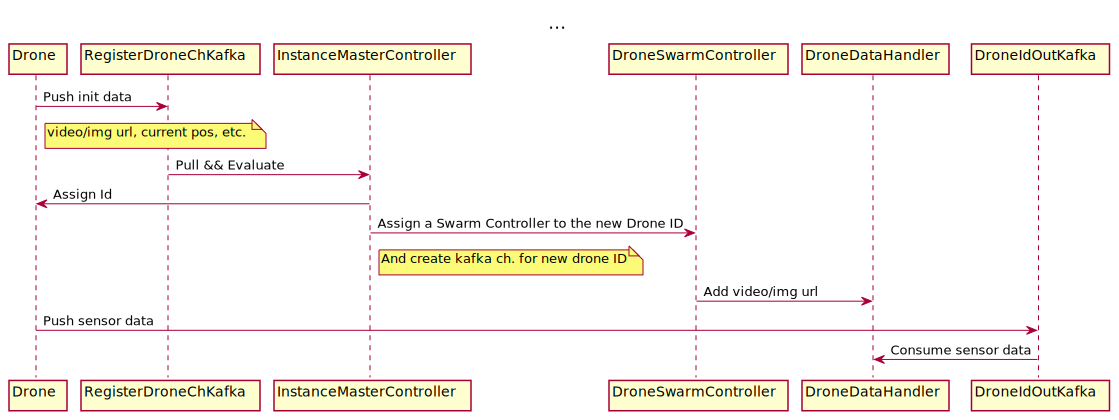

In [52]:
txt = """
title ...

Drone->RegisterDroneChKafka: Push init data
note right of Drone: video/img url, current pos,  etc.
RegisterDroneChKafka->InstanceMasterController: Pull && Evaluate
InstanceMasterController->Drone: Assign Id
InstanceMasterController->DroneSwarmController: Assign a Swarm Controller to the new Drone ID
note right of InstanceMasterController: And create kafka ch. for new drone ID
DroneSwarmController->DroneDataHandler: Add video/img url
Drone->DroneIdOutKafka: Push sensor data
DroneIdOutKafka->DroneDataHandler: Consume sensor data
 """

# note right of Bob: Bob thinks about it
# Bob->Alice: Authentication Response
# Alice->Bob: Authentication Request
# Bob->Alice: Authentication Response
# RegisterChKafka -> InstanceAddrCntr: Evaluate
# Dron->RegisterChKafka: Register3


show_plant(txt)



